In [ ]:
# 1. Import Necessary Modules
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch.nn.functional as F


# Configure logging
import logging



In [3]:
df_freezer = pd.read_csv('deddiag_freezer.csv')
df_washine_machine = pd.read_csv('deddiag_washine_machine.csv')

In [4]:
df_freezer.rename(columns={'value': 'freezer'}, inplace=True)
df_washine_machine.rename(columns={'value': 'washine_machine'}, inplace=True)

In [6]:

# Convert 'time' column to DatetimeIndex
df_freezer['time'] = pd.to_datetime(df_freezer['time'])
df_washine_machine['time'] = pd.to_datetime(df_washine_machine['time'])

# Set the 'time' column as index
df_washine_machine.set_index('time', inplace=True)
df_freezer.set_index('time', inplace=True)

# Resample to 2-minute intervals, using mean or another method as needed
df1_resampled = df_freezer.resample('T').mean()  # '2T' stands for 2-minute intervals
df2_resampled = df_washine_machine.resample('T').mean()

# Merge the resampled datasets based on the time index
merged_df = pd.merge(df1_resampled, df2_resampled, left_index=True, right_index=True, how='inner')

# Display the merged DataFrame
print(merged_df)


C:\Users\tavkazam\AppData\Local\Temp\5\ipykernel_20336\2469477209.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df1_resampled = df_freezer.resample('T').mean()  # '2T' stands for 2-minute intervals
C:\Users\tavkazam\AppData\Local\Temp\5\ipykernel_20336\2469477209.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df2_resampled = df_washine_machine.resample('T').mean()


                     Unnamed: 0_x  item_id_x    freezer  Unnamed: 0_y  \
time                                                                    
2016-12-08 15:24:00     1666223.0       11.0   0.786323       46614.5   
2016-12-08 15:25:00     1666282.0       11.0   0.788162           NaN   
2016-12-08 15:26:00     1666341.0       11.0   0.789660           NaN   
2016-12-08 15:27:00     1666400.0       11.0   0.785353           NaN   
2016-12-08 15:28:00     1666459.0       11.0   0.787635           NaN   
...                           ...        ...        ...           ...   
2018-12-12 14:39:00    60212214.5       11.0  23.215038           NaN   
2018-12-12 14:40:00    60212274.5       11.0  22.881993           NaN   
2018-12-12 14:41:00    60212334.5       11.0  22.699633           NaN   
2018-12-12 14:42:00    60212394.5       11.0  22.462719     2681998.5   
2018-12-12 14:43:00    60212454.5       11.0  22.299502     2682004.5   

                     item_id_y  washine_machine  


In [7]:
data = merged_df[["freezer", "washine_machine"]]

In [8]:
data["aggregate"] = data["freezer"] + data["washine_machine"]

C:\Users\tavkazam\AppData\Local\Temp\5\ipykernel_20336\2139737257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["aggregate"] = data["freezer"] + data["washine_machine"]


In [9]:
data

,freezer,washine_machine,aggregate
time,,,
2016-12-08 15:24:00,0.786323,0.135254,0.921577
2016-12-08 15:25:00,0.788162,NaN,NaN
2016-12-08 15:26:00,0.789660,NaN,NaN
2016-12-08 15:27:00,0.785353,NaN,NaN
2016-12-08 15:28:00,0.787635,NaN,NaN
...,...,...,...
2018-12-12 14:39:00,23.215038,NaN,NaN
2018-12-12 14:40:00,22.881993,NaN,NaN
2018-12-12 14:41:00,22.699633,NaN,NaN


2024-12-25 15:02:06,394 - INFO - First few rows of the data:
                      freezer  washine_machine  aggregate
time                                                     
2016-12-08 15:24:00  0.786323         0.135254   0.921577
2016-12-08 15:25:00  0.788162              NaN        NaN
2016-12-08 15:26:00  0.789660              NaN        NaN
2016-12-08 15:27:00  0.785353              NaN        NaN
2016-12-08 15:28:00  0.787635              NaN        NaN
2024-12-25 15:02:06,543 - INFO - Summary statistics:
            freezer  washine_machine     aggregate
count  1.011246e+06     87765.000000  87764.000000
mean   8.869178e+00        89.240083     98.225309
std    1.037719e+01       362.656699    362.890746
min    6.501550e-01         0.000000      0.767996
25%    8.041509e-01         0.137266      0.956009
50%    8.154790e-01         3.798945     14.118096
75%    2.168277e+01         4.330756     26.522099
max    8.943431e+01      4425.517578   4426.307589
2024-12-25 15:02:06,5

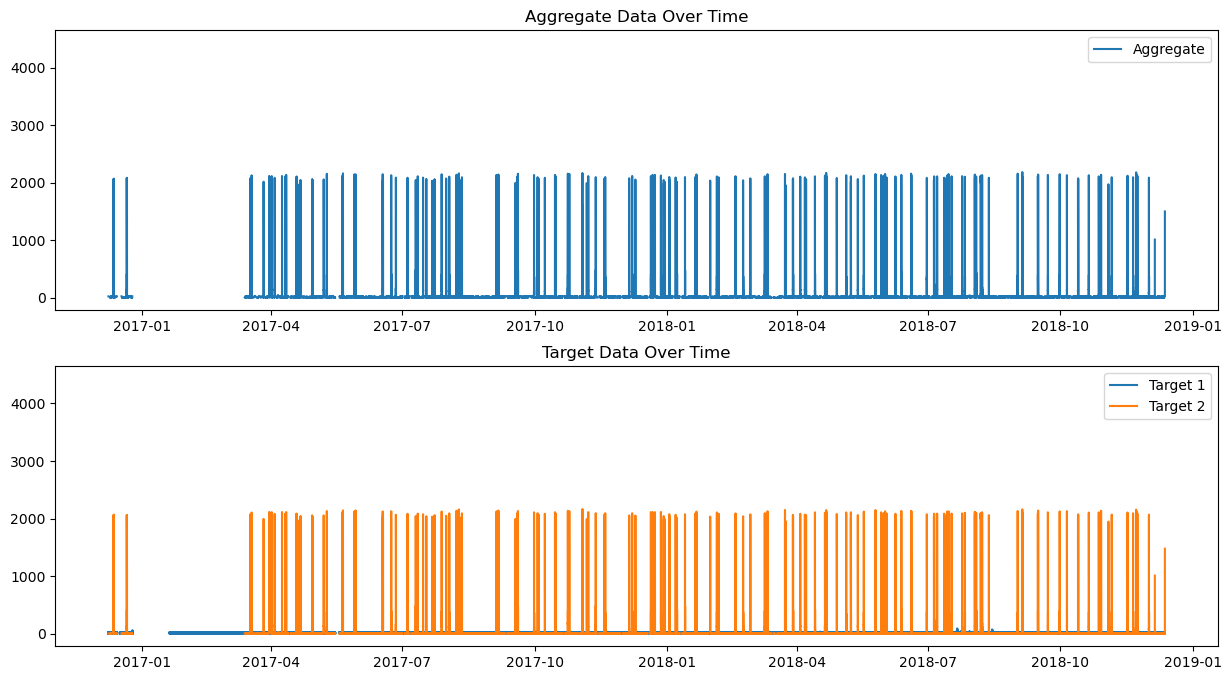

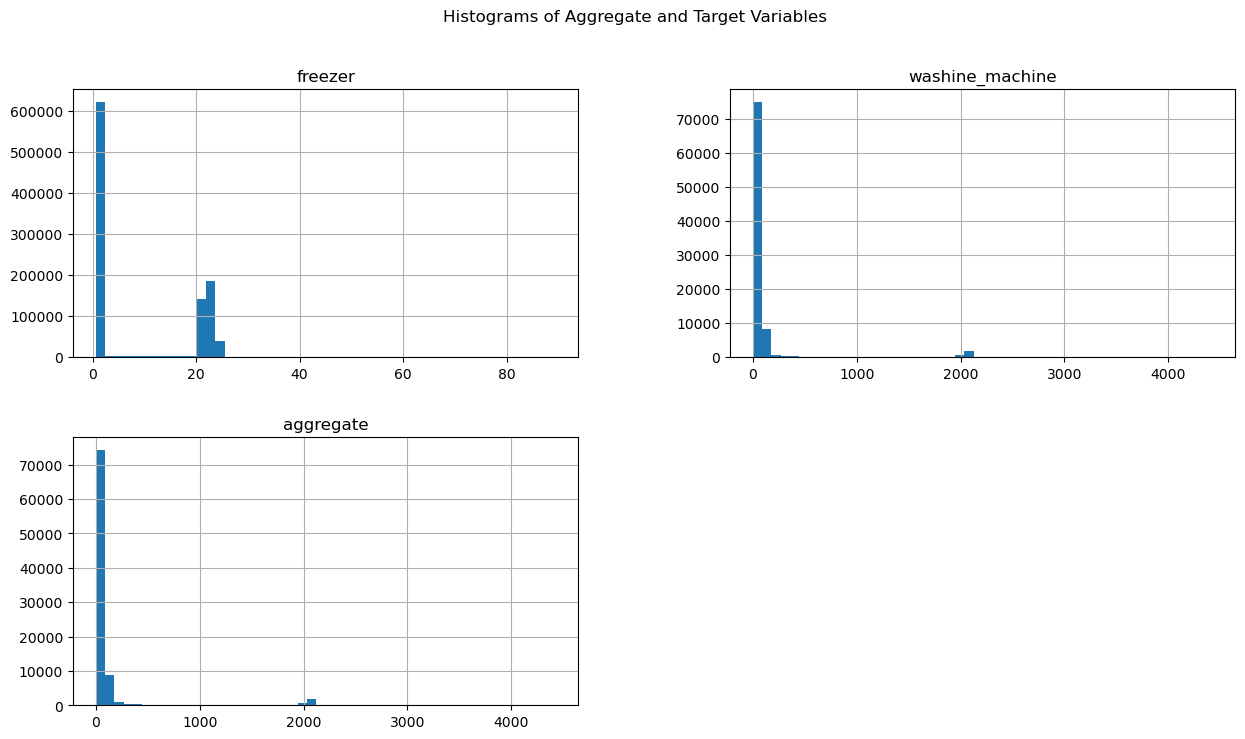

2024-12-25 15:02:09,499 - INFO - Handling missing values.
2024-12-25 15:02:09,515 - INFO - Data shape after dropping missing values: (1056920, 3)


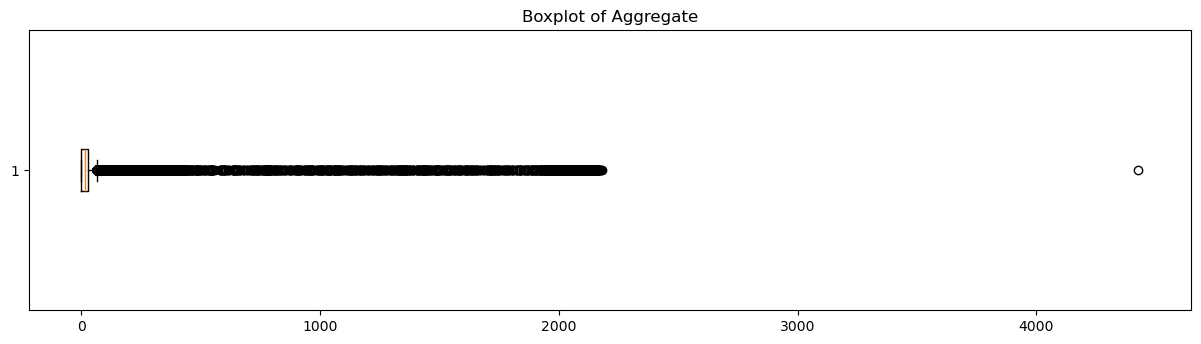

In [10]:

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# 2. Load and Inspect the Data
#logger.info("Loading and inspecting the dataset.")
#data = pd.read_csv('deddiag_cleaned.csv', parse_dates=['time'])

# Display the first few rows of the dataset
logger.info(f"First few rows of the data:\n{data.head()}")

# Display summary statistics
logger.info(f"Summary statistics:\n{data.describe()}")

# Check for missing values
missing_values = data.isnull().sum()
logger.info(f"Missing values in each column:\n{missing_values}")

# 3. Visualize the Data
logger.info("Visualizing the data.")
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['aggregate'], label='Aggregate')

plt.legend()
plt.title('Aggregate Data Over Time')

plt.subplot(2, 1, 2)
plt.plot(data.index, data['freezer'], label='Target 1')
plt.plot(data.index, data['washine_machine'], label='Target 2')

plt.legend()
plt.title('Target Data Over Time')
plt.show()

# Histograms
data.hist(figsize=(15, 8), bins=50)
plt.suptitle('Histograms of Aggregate and Target Variables')
plt.show()

# Boxplots
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.boxplot(data['aggregate'].dropna(), vert=False)
plt.title('Boxplot of Aggregate')



# 4. Handling Missing Values
logger.info("Handling missing values.")
data_ = data.dropna()
logger.info(f"Data shape after dropping missing values: {data.shape}")






In [22]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import logging
import random

# Set Random Seed for Reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Model Definitions
class Encoder(nn.Module):
    def __init__(self, in_features=3, out_features=1, kernel_size=3, padding=1, stride=1):
        super(Encoder, self).__init__()
        self.conv = nn.Conv1d(in_features, out_features, kernel_size=kernel_size, padding=padding, stride=stride, bias=False)
        self.bn = nn.BatchNorm1d(out_features)
        self.drop = nn.Dropout(0.1)

    def forward(self, x):
        return self.drop(self.bn(F.relu(self.conv(x))))

class TemporalPooling(nn.Module):
    def __init__(self, in_features=3, out_features=1, kernel_size=2):
        super(TemporalPooling, self).__init__()
        self.kernel_size = kernel_size
        self.pool = nn.AvgPool1d(kernel_size=self.kernel_size, stride=self.kernel_size)
        self.conv = nn.Conv1d(in_features, out_features, kernel_size=1, padding=0)
        self.bn = nn.BatchNorm1d(out_features)
        self.drop = nn.Dropout(0.1)

    def forward(self, x):
        x = self.pool(x)
        x = self.conv(x)
        x = self.bn(F.relu(x))
        return self.drop(F.interpolate(x, scale_factor=self.kernel_size, mode='linear', align_corners=True))

class Decoder(nn.Module):
    def __init__(self, in_features=384, out_features=1, kernel_size=5, stride=5, output_padding=2):
        super(Decoder, self).__init__()
        self.conv = nn.ConvTranspose1d(in_features, out_features, kernel_size=kernel_size, stride=stride, output_padding=output_padding, bias=False)
        self.bn = nn.BatchNorm1d(out_features)
        self.upsample = nn.Upsample(size=60, mode='linear', align_corners=True)

    def forward(self, x):
        x = F.relu(self.conv(x))
        return self.upsample(x)

class PTPNet(nn.Module):
    def __init__(self, in_channels=1, out_channels=2, init_features=32):
        super(PTPNet, self).__init__()
        features = init_features
        self.encoder1 = Encoder(in_channels, features, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=1)
        self.encoder2 = Encoder(features, features * 2, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=1)
        self.encoder3 = Encoder(features * 2, features * 4, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=1)
        self.encoder4 = Encoder(features * 4, features * 8, kernel_size=3, padding=1)

        self.tpool1 = TemporalPooling(features * 8, features * 2, kernel_size=2)
        self.tpool2 = TemporalPooling(features * 8, features * 2, kernel_size=2)

        self.decoder = Decoder(384, features, kernel_size=5, stride=5, output_padding=2)
        self.activation = nn.Conv1d(features, out_channels, kernel_size=1, padding=0)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(self.pool1(enc1))
        enc3 = self.encoder3(self.pool2(enc2))
        enc4 = self.encoder4(self.pool3(enc3))

        tp1 = self.tpool1(enc4)
        tp2 = self.tpool2(enc4)

        min_length = min(enc4.size(2), tp1.size(2), tp2.size(2))
        enc4, tp1, tp2 = enc4[:, :, :min_length], tp1[:, :, :min_length], tp2[:, :, :min_length]
        dec_input = torch.cat([enc4, tp1, tp2], dim=1)

        dec = self.decoder(dec_input)
        return self.sigmoid(self.activation(dec))

# Data Preprocessing
sequence_length = 60
X = data['aggregate'].values
y = data[['freezer', 'washine_machine']].values

logger.info(f"Loaded dataset. Shape of X: {X.shape}, Shape of y: {y.shape}")

# Create sequences
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i + seq_length])
        y_seq.append(y[i:i + seq_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Scale the data
scaler_X = MinMaxScaler()
X_seq_scaled = scaler_X.fit_transform(X_seq.reshape(-1, 1)).reshape(X_seq.shape)

scaler_y_list, y_seq_scaled_list = [], []
for i in range(y_seq.shape[2]):
    scaler_y = MinMaxScaler()
    scaled_target = scaler_y.fit_transform(y_seq[:, :, i])
    y_seq_scaled_list.append(scaled_target)
    scaler_y_list.append(scaler_y)

y_seq_scaled = np.stack(y_seq_scaled_list, axis=2)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq_scaled, y_seq_scaled, test_size=0.3, random_state=42, shuffle=False)
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


2024-12-25 15:09:01,523 - INFO - Loaded dataset. Shape of X: (87764,), Shape of y: (87764, 2)


In [24]:
# 1. Initialize Model
model = PTPNet(in_channels=1, out_channels=2, init_features=32)

# 2. Load Pretrained Weights
pretrained_weights_path = 'UKDALE_final_model_weights.pth'
pretrained_dict = torch.load(pretrained_weights_path, map_location=torch.device('cpu'))

# Filter out unnecessary keys to ensure compatibility
model_dict = model.state_dict()
pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and model_dict[k].shape == v.shape}

# Update the model's state_dict with the pretrained weights
model_dict.update(pretrained_dict)
model.load_state_dict(model_dict)
logger.info("Pretrained weights loaded into the model.")

# Freeze encoder layers to retain pre-trained features initially
for name, param in model.named_parameters():
    if 'encoder' in name:
        param.requires_grad = False

# 3. Define Loss, Optimizer, and Scheduler
criterion = nn.MSELoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# 4. Training Loop
for epoch in range(20):
    model.train()
    epoch_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        inputs = inputs.unsqueeze(1)  # Add channel dimension
        outputs = model(inputs)
        loss = criterion(outputs.permute(0, 2, 1), targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    scheduler.step()
    logger.info(f"Epoch {epoch+1}, Loss: {epoch_loss / len(train_loader):.6f}")

    # Gradually unfreeze encoder layers after 10 epochs for fine-tuning
    if epoch == 10:
        for name, param in model.named_parameters():
            if 'encoder' in name:
                param.requires_grad = True

# 5. Evaluation
model.eval()
predictions, targets_list = [], []
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs = inputs.unsqueeze(1)  # Add channel dimension
        outputs = model(inputs)
        predictions.append(outputs.cpu().numpy())
        targets_list.append(targets.cpu().numpy())

# 6. Reshape for Metrics
predictions_array = np.concatenate(predictions, axis=0)
targets_array = np.concatenate(targets_list, axis=0)

# 7. Metrics Calculation
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse


2024-12-25 15:10:15,491 - INFO - Pretrained weights loaded into the model.
2024-12-25 15:12:33,252 - INFO - Epoch 1, Loss: 0.009107
2024-12-25 15:13:19,662 - INFO - Epoch 2, Loss: 0.005651
2024-12-25 15:13:56,557 - INFO - Epoch 3, Loss: 0.004594
2024-12-25 15:14:51,599 - INFO - Epoch 4, Loss: 0.004144
2024-12-25 15:15:27,019 - INFO - Epoch 5, Loss: 0.003965
2024-12-25 15:16:17,554 - INFO - Epoch 6, Loss: 0.003868
2024-12-25 15:17:27,400 - INFO - Epoch 7, Loss: 0.003791
2024-12-25 15:18:18,811 - INFO - Epoch 8, Loss: 0.003743
2024-12-25 15:19:16,983 - INFO - Epoch 9, Loss: 0.003705
2024-12-25 15:20:10,082 - INFO - Epoch 10, Loss: 0.003657
2024-12-25 15:20:49,748 - INFO - Epoch 11, Loss: 0.003580
2024-12-25 15:21:54,243 - INFO - Epoch 12, Loss: 0.003565
2024-12-25 15:22:54,911 - INFO - Epoch 13, Loss: 0.003545
2024-12-25 15:24:06,319 - INFO - Epoch 14, Loss: 0.003538
2024-12-25 15:25:38,133 - INFO - Epoch 15, Loss: 0.003533
2024-12-25 15:26:55,583 - INFO - Epoch 16, Loss: 0.003532
2024-1

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Transpose predictions to match targets
predictions_array = predictions_array.transpose(0, 2, 1)  # From (26312, 2, 60) to (26312, 60, 2)

# Log shapes to confirm
print(f"Targets Shape: {targets_array.shape}")        # (26312, 60, 2)
print(f"Predictions Shape: {predictions_array.shape}")  # (26312, 60, 2)
# Metrics Calculation
def calculate_metrics(y_true, y_pred, threshold=0.1):
    # Flatten and binarize targets and predictions
    y_true_binary = (y_true > threshold).astype(int)
    y_pred_binary = (y_pred > threshold).astype(int)

    # Calculate regression metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # Calculate classification metrics
    precision = precision_score(y_true_binary, y_pred_binary)
    recall = recall_score(y_true_binary, y_pred_binary)
    f1 = f1_score(y_true_binary, y_pred_binary)
    accuracy = accuracy_score(y_true_binary, y_pred_binary)

    return mae, rmse, precision, recall, f1, accuracy

# Loop through each appliance
for i, appliance in enumerate(["Freezer", "Washing Machine"]):
    y_true = targets_array[:, :, i].flatten()
    y_pred = predictions_array[:, :, i].flatten()

    mae, rmse, precision, recall, f1, accuracy = calculate_metrics(y_true, y_pred, threshold=0.1)
    print(f"{appliance}:")
    print(f"  MAE: {mae:.4f}, RMSE: {rmse:.4f}")
    print(f"  Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, Accuracy: {accuracy:.4f}")


Targets Shape: (26312, 60, 2)
Predictions Shape: (26312, 60, 2)
Freezer:
  MAE: 0.0529, RMSE: 0.0820
  Precision: 0.7679, Recall: 0.9244, F1 Score: 0.8389, Accuracy: 0.8594
Washing Machine:
  MAE: 0.0042, RMSE: 0.0178
  Precision: 0.9320, Recall: 0.9698, F1 Score: 0.9505, Accuracy: 0.9967
